In [1]:
from nltk.corpus import reuters

### Charger les données

In [2]:
#recuperation du vocabulaire du corpus
vocabulaire=reuters.words()

#recuperation de toutes les categories
categories=reuters.categories()

#recuperation de tous les id des fichiers appartenant à une categorie bien determinée
ids_coffe=reuters.fileids("coffee")

#recuperation des mots contenus dans les documents d'une categorie bien determinee
coffe_words=reuters.words(reuters.fileids("coffee"))

#recuperation du texte brut des documents d'une categorie bien determinee
cofee_docs=reuters.raw(reuters.fileids("coffee")[0])

#recuperation de toutes les autres classe d'un document annoté avec une classe bien determinee
classes_Annotated_coffee=reuters.categories(reuters.fileids("coffee"))

#recuperer le dataset d'apprentissage
train_categories=[ reuters.categories(i) for i in reuters.fileids() if i.startswith('training/')]
train_documents = [reuters.raw(i) for i in reuters.fileids() if i.startswith('training/')]

#recuperer le dataset de test
test_documents=[reuters.raw(i)  for i in reuters.fileids() if i.startswith('test/')]
test_categories = [reuters.categories(i) for i in reuters.fileids() if i.startswith('test/')]

# recuperer tout le corpus
whole_docs=[reuters.raw(i)for i in reuters.fileids()]
whole_cats = [ reuters.categories(i) for i in reuters.fileids()]

### Pretraitements

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')

#Generer le vocabulaire à partir du whole_docs
#Realiser les differentes operations NLP permettant d'unifier la representation
#vectorielle de tout le corpus

#whole_docs=.........
vect_whole_docs = vectorizer.fit_transform(whole_docs)
print(vectorizer.get_feature_names_out())

#vectoriser les datasets d'apprentissage et de test
vect_train_docs = vectorizer.transform(train_documents)
vect_test_docs = vectorizer.transform(test_documents)
print(vect_train_docs.toarray())
print(vect_test_docs.toarray())

['00' '000' '0000' ... 'zy' 'zzzz' 'üside']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07837603 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.18232755 0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06296253 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [4]:
#recuperer des labels uniques pour les categories
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)
whole_labels = mlb.fit_transform(whole_cats)

print(mlb.classes_)
print(whole_labels)

['acq' 'alum' 'barley' 'bop' 'carcass' 'castor-oil' 'cocoa' 'coconut'
 'coconut-oil' 'coffee' 'copper' 'copra-cake' 'corn' 'cotton' 'cotton-oil'
 'cpi' 'cpu' 'crude' 'dfl' 'dlr' 'dmk' 'earn' 'fuel' 'gas' 'gnp' 'gold'
 'grain' 'groundnut' 'groundnut-oil' 'heat' 'hog' 'housing' 'income'
 'instal-debt' 'interest' 'ipi' 'iron-steel' 'jet' 'jobs' 'l-cattle'
 'lead' 'lei' 'lin-oil' 'livestock' 'lumber' 'meal-feed' 'money-fx'
 'money-supply' 'naphtha' 'nat-gas' 'nickel' 'nkr' 'nzdlr' 'oat' 'oilseed'
 'orange' 'palladium' 'palm-oil' 'palmkernel' 'pet-chem' 'platinum'
 'potato' 'propane' 'rand' 'rape-oil' 'rapeseed' 'reserves' 'retail'
 'rice' 'rubber' 'rye' 'ship' 'silver' 'sorghum' 'soy-meal' 'soy-oil'
 'soybean' 'strategic-metal' 'sugar' 'sun-meal' 'sun-oil' 'sunseed' 'tea'
 'tin' 'trade' 'veg-oil' 'wheat' 'wpi' 'yen' 'zinc']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### SVM simple

In [5]:
#SVM
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


classifier_svm = OneVsRestClassifier(LinearSVC())
classifier_svm.fit(vect_train_docs,train_labels)
test_labels_predict=classifier_svm.predict(vect_test_docs)
print(classification_report(test_labels,test_labels_predict))
scores=classifier_svm.score(vect_test_docs,test_labels)
print("SVM score :{}".format(scores))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       719
           1       1.00      0.43      0.61        23
           2       1.00      0.64      0.78        14
           3       0.95      0.60      0.73        30
           4       0.88      0.39      0.54        18
           5       0.00      0.00      0.00         1
           6       1.00      0.94      0.97        18
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         3
           9       0.96      0.96      0.96        28
          10       1.00      0.78      0.88        18
          11       0.00      0.00      0.00         1
          12       0.95      0.71      0.82        56
          13       1.00      0.50      0.67        20
          14       0.00      0.00      0.00         2
          15       0.92      0.43      0.59        28
          16       0.00      0.00      0.00         1
          17       0.91    

### SVM avec validation croisé

In [6]:
# Classification SVM avec cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_samples', 'recall_samples', 'f1_samples']
scores_svm = cross_validate(classifier_svm, vect_whole_docs, whole_labels, cv=3, scoring=scoring)
print(scores_svm['fit_time'])
print(scores_svm['score_time'])
print(scores_svm['test_precision_samples'])
print(scores_svm['test_recall_samples'])
print(scores_svm['test_f1_samples'])

[2.38013768 2.552423   2.14042521]
[0.2086215  0.17915845 0.16136146]
[0.86598999 0.87977382 0.88399611]
[0.84546102 0.86121606 0.86284829]
[0.8475128  0.86216063 0.86600443]


# EXERCICE

### 1. KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(vect_train_docs, train_labels)
test_labels_predict_knn = classifier_knn.predict(vect_test_docs)

print("KNN Classification Report:")
print(classification_report(test_labels, test_labels_predict_knn))

scores_knn = classifier_knn.score(vect_test_docs, test_labels)
print("KNN Score: {}".format(scores_knn))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f636204ce00>
Traceback (most recent call last):
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f636204ce00>
Traceback (most recent call last):
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/olivier/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.80       719
           1       0.77      0.43      0.56        23
           2       0.86      0.43      0.57        14
           3       0.62      0.53      0.57        30
           4       0.73      0.61      0.67        18
           5       0.00      0.00      0.00         1
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         3
           9       0.83      0.89      0.86        28
          10       0.74      0.78      0.76        18
          11       0.00      0.00      0.00         1
          12       0.70      0.59      0.64        56
          13       0.82      0.45      0.58        20
          14       0.00      0.00      0.00         2
          15       0.82      0.50      0.62        28
          16       0.00      0.00      0.00         1


In [14]:
type(scores_knn)

numpy.float64

### 2. Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier_ensemble = RandomForestClassifier()
classifier_ensemble.fit(vect_train_docs, train_labels)
test_labels_predict_ensemble = classifier_ensemble.predict(vect_test_docs)

print("Ensemble Classification Report:")
print(classification_report(test_labels, test_labels_predict_ensemble))

scores_ensemble = classifier_ensemble.score(vect_test_docs, test_labels)
print("Ensemble Score: {}".format(scores_ensemble))

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       719
           1       1.00      0.04      0.08        23
           2       1.00      0.07      0.13        14
           3       1.00      0.07      0.12        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       1.00      0.21      0.35        28
          10       1.00      0.11      0.20        18
          11       0.00      0.00      0.00         1
          12       1.00      0.23      0.38        56
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00         2
          15       0.67      0.07      0.13        28
          16       0.00      0.00      0.00      

### 3. MLP

In [10]:
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(activation='logistic', solver='sgd')
classifier_mlp.fit(vect_train_docs, train_labels)
test_labels_predict_mlp = classifier_mlp.predict(vect_test_docs)

print("MLP Classification Report:")
print(classification_report(test_labels, test_labels_predict_mlp))

scores_mlp = classifier_mlp.score(vect_test_docs, test_labels)
print("MLP Score: {}".format(scores_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       719
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        56
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00         1


### Comparaison des scores

In [28]:
scores_svm = scores_svm
scores_knn = scores_knn
scores_ensemble = scores_ensemble
scores_mlp = scores_mlp

'scores_svm = scores_svm\nscores_knn = scores_knn\nscores_ensemble = scores_ensemble\nscores_mlp = scores_mlp'

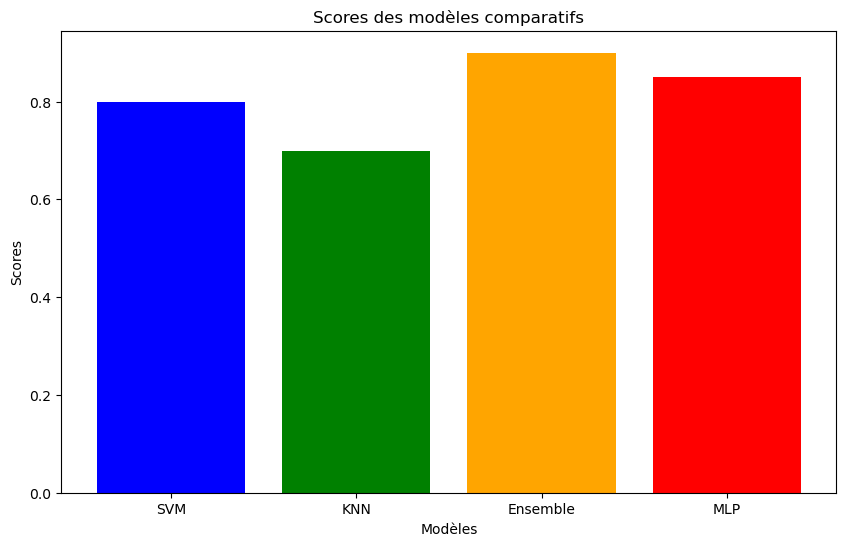

In [29]:
import matplotlib.pyplot as plt

list_scores = [scores_svm, scores_knn, scores_ensemble, scores_mlp]

# Noms des modèles
model_names = ['SVM', 'KNN', 'Ensemble', 'MLP']

# Créer un graphique comparatif
plt.figure(figsize=(10, 6))
plt.bar(model_names, list_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Scores des modèles comparatifs')
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.show()

### 4. Feature selection SelectKBest de la librairie sklearn

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest for feature selection
k_best = SelectKBest(chi2, k=10) 

vect_train_docs_selected = k_best.fit_transform(vect_train_docs, train_labels)
vect_test_docs_selected = k_best.transform(vect_test_docs)

# Train and test a classifier on the selected features
classifier_selected = OneVsRestClassifier(LinearSVC())
classifier_selected.fit(vect_train_docs_selected, train_labels)
test_labels_predict_selected = classifier_selected.predict(vect_test_docs_selected)

print("Classification Report with Feature Selection:")
print(classification_report(test_labels, test_labels_predict_selected))

scores_selected = classifier_selected.score(vect_test_docs_selected, test_labels)
print("Score with Feature Selection: {}".format(scores_selected))

Classification Report with Feature Selection:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       719
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        18
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        56
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00        28
          16       0.00      0.00  